### IS727272 - Cordero Hernández, Marco Ricardo

# Ejercicio 4.1.5 Bike Sharing Daily, Regression, Gradient Descent, Overfitting

El modelo de regresión es un procedimiento estadístico que permite al investigador estimar la relación lineal que relaciona dos o más variables.

- El algoritmo de programacion para implementar el modelo de regresión lineal es el siguiente: 

    1. Cargar el dataset, normalizar y dividir los datos en datos de entrenamiento y datos de prueba, añadir la columna de unos para w0.
    2. Inicializar W, y calcular el gradiente de W
    3. Mientras el gradiente sea más grande que epsilon, calcular:
        - El gradiente para el valor actual de W
        - Actualizar el valor para el siguiente W
        - Cacular el costo y almacenarlo en una variable
    4. Obtener la función de costo o error para el último valor de W
    5. Predecir la salida con los datos de prueba y obtener el valor del error. 

- Para comprobar el Overfitting realizar el algoritmo de GD con 9 tamaños de datos de prueba: 0.1, 0.2,..., 0.9, y graficar el costo.

- ¿Con qué tamaño de prueba (test_size) tendremos overfitting y con cuál underfiting?
- Finalmente utilizar el test size que se eligió y hacer regresión polinomial de grado 1 al 5 y graficar el comportamiento del costo.

## 1. Cargar el dataset, normalizar y dividir los datos en datos de entrenamiento y datos de prueba, añadir la columna de unos para w0.

Para este caso utilizaremos los datos del ejercicio de las Bicis, el dataset de horas. 

In [1]:
# Import libraries
import math
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from numpy.linalg import norm
from numpy.random import rand
import math

In [2]:
# 1. Load the dataset and convert to numpy arrays

def loadCsv(filename):
    data = pd.read_csv(filename)
    dataset = np.array(data)
    m, n = np.shape(dataset)
    x = dataset[:, 0:n-1]
    y = dataset[:, -1]
    y = np.reshape(y ,(m,1))
    
    return x, y

#Testing
filename = './Datasets/bike-day.csv'
x, y = loadCsv(filename)
print('X size:',np.shape(x), 'Y size:',  np.shape(y))

X size: (731, 11) Y size: (731, 1)


In [3]:
# Normalizar el dataset

def normalize(x):
    x_norm = (x - np.mean(x, axis=0)) / (np.ndarray.std(x, axis=0)) 
    return x_norm

X_norm = normalize(x)

print(np.shape(X_norm))
print(X_norm)

(731, 11)
[[-1.34821315 -1.00136893 -1.60016072 ... -0.67994602  1.25017133
  -0.38789169]
 [-1.34821315 -1.00136893 -1.60016072 ... -0.74065231  0.47911298
   0.74960172]
 [-1.34821315 -1.00136893 -1.60016072 ... -1.749767   -1.33927398
   0.74663186]
 ...
 [-1.34821315  0.99863295  1.58866019 ... -1.42434419  0.87839173
  -0.85355213]
 [-1.34821315  0.99863295  1.58866019 ... -1.49004895 -1.01566357
   2.06944426]
 [-1.34821315  0.99863295  1.58866019 ... -1.54048197 -0.35406086
  -0.46020122]]


In [4]:
# Split datasets into training and testing
def splitDataset(x, y,test_size):
    xTrain, xTest, yTrain, yTest = train_test_split(x, y, test_size = test_size, random_state = 1)
    return xTrain, xTest, yTrain, yTest

#Testing
test_size = 0.33
xTrain, xTest, yTrain, yTest = splitDataset(X_norm, y,test_size)

print('Split X', len(x), 'rows into train with', len(xTrain), 'and test with', len(xTest))
print('Split Y', len(y), 'rows into train with', len(yTrain), 'and test with', len(yTest))

Split X 731 rows into train with 489 and test with 242
Split Y 731 rows into train with 489 and test with 242


In [5]:
# Adding column 1 to the X matrix

def addOnes(X):
    X1=np.array(X)
    m , n = np.shape(X1)
    ones = np.ones((m, 1))
    X1 = np.concatenate((ones, X1), axis=1)
    return X1

xTr = addOnes(xTrain)
xTe = addOnes(xTest)
print(np.shape(xTr))
print(np.shape(xTe))

(489, 12)
(242, 12)


## 2. Inicializar W, y calcular el gradiente de W


El gradiente es: $$ \nabla J(W) = \frac{\partial J(W) }{\partial W} = \frac{\partial}{\partial W} (Y - XW)^2 = -2X(Y-XW)$$

In [6]:
# Initialize W using random values
m, n = np.shape(xTr)
print(m,n)
initw = np.random.rand(1, n)
print(initw)

489 12
[[0.98256008 0.09556146 0.85625172 0.32407212 0.68537617 0.36430507
  0.9460736  0.3490946  0.31070899 0.46729909 0.22019216 0.2992722 ]]


In [7]:
# Calculating Gradient

def gradient(X, Y, W):
    residual = Y - np.dot(X,W.T)
    grad = -2 * np.dot(X.T, residual)
    return grad

# Testing gradient function

Gradiente = gradient(xTr, yTrain, initw)
print(Gradiente)

[[-4512829.32877777]
 [ -897838.31630809]
 [-1105142.51900874]
 [ -619479.51377319]
 [   97476.93481146]
 [  131079.04504012]
 [   59357.92497685]
 [  712692.45664297]
 [-1405834.66857318]
 [-1414592.30766367]
 [   48915.91614255]
 [  436361.4674769 ]]


## 3. Iteración del Gradiente Descendente 

    Mientras la norma del gradiente sea más grande que epsilon, calcular:
    
       - El gradiente para el valor actual de W
       - Actualizar el valor siguiente de W
       - Almacenar el valor del error o del costo para ese W


Primero definiremos la función que evalua el error utilizando MSE: $$MSE(w) = \frac{1}{N} \sum_{i=1}^{N} (y_i - x_i w)^2$$

In [8]:
# Cost Function

def mse(Y, Yt):
    residual = Y - Yt
    cost = np.dot(residual.T,residual) / len(Y)
    return cost

W [[4526.93683507  496.8498253  1034.77564527  -50.32479094  -54.60200422
   170.03900539   41.89095635 -316.18055968  457.07980154  490.21875692
  -173.72697084 -174.78700846]]
Iterations 1000
Error final  747412.0062132964


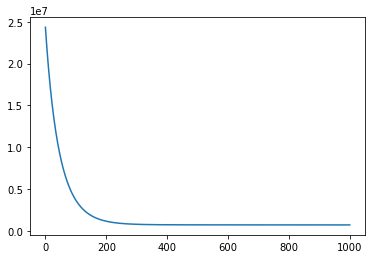

In [9]:
# Gradient Descent with epsilon using the number of iterations

def GD(X, Y, W, alpha, epsilon, iterations):
    grad = gradient(X, Y, W)
    gradNorm = np.linalg.norm(grad)
    Yt = np.dot(X,W.T)
    cost = mse(Y,Yt)
    it = 0
    J = [] #Lista donde guardaremos el valor del error (MSE) en cada iteración
    
    while gradNorm > epsilon and it < iterations:
        
        # Calcular gradiente
        grad = gradient(X, Y, W)
        gradNorm = np.linalg.norm(grad)
        
        # Actualizar W
        W = W - alpha * grad.T
        
        # Incrementar contador de iteraciones
        it += 1
        
        # Calcular la predicción y el error (MSE)
        Yt = np.dot(X, W.T)
        cost  = mse(Y,Yt)

        # Guardar el vector del error
        J.append(float(cost))
        
    return W, it, J

# Testing GD(X, Y, W, alpha, epsilon, iterations)

w, iterations, J = GD(xTr, yTrain, initw, 0.00001, 0.01, 1000)

print('W', w)
print('Iterations', iterations)
print('Error final ', J[-1])
plt.plot(J)

## 4. Medir el MSE del algoritmo



In [10]:
yt = np.dot(xTr, w.T)
costo = mse(yTrain,yt)

print(np.shape(yTrain), np.shape(yt))
print('Error (Costo) final: ', costo)

(489, 1) (489, 1)
Error (Costo) final:  [[747412.0062133]]


## 5. Predecir los datos de prueba y calcular su error

In [11]:
yt = np.dot(xTe, w.T)
costo = mse(yTest,yt)

print(np.shape(yTrain), np.shape(yt))
print(costo)

(489, 1) (242, 1)
[[773275.48387531]]


## 6. Overfitting y Underfitting

In [13]:
# Crear un array que contenga los de tamaños de testing de 0 a 0.9, con un incremento de 0.1
testsize = np.arange(0.1, 1, 0.1)

print(testsize)

[0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9]


X size: (731, 11) Y size: (731, 1)
Test size:  0.1
Costo train:  [[833953.88501503]]
Costo test:  [[635576.36292216]]
Test size:  0.2
Costo train:  [[806179.55258331]]
Costo test:  [[1029065.3162128]]
Test size:  0.30000000000000004
Costo train:  [[897464.30225165]]
Costo test:  [[717357.59378691]]
Test size:  0.4
Costo train:  [[899361.96581744]]
Costo test:  [[831016.76216154]]
Test size:  0.5
Costo train:  [[783490.69662187]]
Costo test:  [[1115701.91278284]]
Test size:  0.6
Costo train:  [[978981.15452683]]
Costo test:  [[952621.96540051]]
Test size:  0.7000000000000001
Costo train:  [[972190.35980728]]
Costo test:  [[1044506.85619953]]
Test size:  0.8
Costo train:  [[1248756.78798596]]
Costo test:  [[1155574.25767884]]
Test size:  0.9
Costo train:  [[1793477.67446639]]
Costo test:  [[1851160.6702283]]


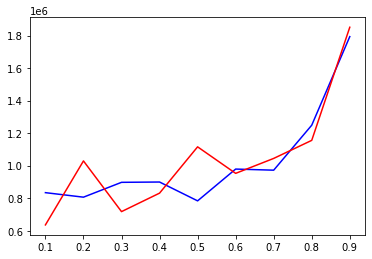

In [22]:
# 1. Por cada elemento del array de tamaños hacer una prueba del Gradiente Descendiente 
# 2. Almacenar los últimos valores de los costos (errores) del Training y del Testing en listas diferentes
# 3. Graficar los costos almacenados con respecto al vector testsize

# Inicialización de parámetros:

# Learning rate o índice de aprendizaje
alpha = 0.00001

# Precisión (qué tan cercano a cero debe estar el error)
epsilon = 0.01

# Número máximo de iteraciones (es útil para que el algoritmo no se cicle)
itera = 2000

# Incialización de listas para guardar los valores finales de los costos
costosTraining = []
costosTest = []

# Cargar el archivo de nuevo y obtener matrices X y Y
filename = './Datasets/bike-day.csv'
x, y = loadCsv(filename)
print('X size:', np.shape(x), 'Y size:', np.shape(y))

# Para cada tamaño de testing hacer el gradiente descendente
for tsize in testsize:
    
    # split X y Y
    xTrain, xTest, yTrain, yTest = train_test_split(x, y, test_size = tsize)
    
    # Acomodar dimensiones de yTrain y YTest
    yTrain = yTrain.reshape(-1, 1)
    yTest = yTest.reshape(-1, 1)
    
    # Añadir Unos a xTrain y xTest 
    xTr = addOnes(xTrain)
    xTe = addOnes(xTest)
    
    # Initizalize w de manera aleatoria
    m, n = np.shape(xTr)
    initw = np.random.rand(1, n)
    
    # Obtener W a través del Gradiente Descendente
    print("Test size: ", tsize)
    
    w, iterations, J = GD(xTr, yTrain, initw, alpha, epsilon, itera)
    
    # Calcular el error (costo) de Train y Test
    costoTrain = mse(yTrain, np.dot(xTr, w.T))
    costoTest = mse(yTest, np.dot(xTe, w.T))
    print('Costo train: ', costoTrain)
    print('Costo test: ', costoTest)
    
    # Guardar costos en las listas
    costosTraining.append(costoTrain)
    costosTest.append(costoTest)
    
    
# Convertir a arrays las listas de los costos
costosTraining = np.array(costosTraining)
costosTest = np.array(costosTest)

# Acomodar sus dimensiones para poder graficar
costosTraining = costosTraining.reshape(-1, 1)
costosTest = costosTest.reshape(-1, 1)

# Graficar los costos con respecto a testsize
plt.plot(testsize, costosTraining, 'b')
plt.plot(testsize, costosTest, 'r')

## 7. Add Polynomial features

- Para observar el Underfitting y el Overfitting de estos datos hacer un modelo para cada grado polinomial hasta grado 5.  

    - Prueba 1: $ X = [x]$
    - Prueba 2: $ X = [x \quad x^2]$
    - Prueba 3: $ X = [x \quad x^2 \quad x^3]$
    - Prueba 4: $ X = [x \quad x^2 \quad x^3 \quad x^4]$
    - Prueba 5: $ X = [x \quad x^2 \quad x^3 \quad x^4 \quad x^5]$

- De cada prueba obtener sus W's correspondientes y su error MSE (Costo)

- Graficar el MSE de cada prueba con respecto al grado utilizado



X size: (731, 11) Y size: (731, 1)
Grade:  1
438 12
W:  (1, 12)
Iteraciones:  10000
Training cost: [[24658019.95206101]]
Testing cost: [[22904032.32931948]]
Grade:  2
438 23
W:  (1, 23)
Iteraciones:  10000
Training cost: [[24148346.04536992]]
Testing cost: [[22428452.8168588]]
Grade:  3
438 34
W:  (1, 34)
Iteraciones:  10000
Training cost: [[16561057.51369905]]
Testing cost: [[15621164.97257762]]
Grade:  4
438 45
W:  (1, 45)
Iteraciones:  10000
Training cost: [[13623920.47214294]]
Testing cost: [[13860444.66780076]]
Grade:  5
438 56
W:  (1, 56)
Iteraciones:  10000
Training cost: [[9060614.08567606]]
Testing cost: [[9634775.09618752]]


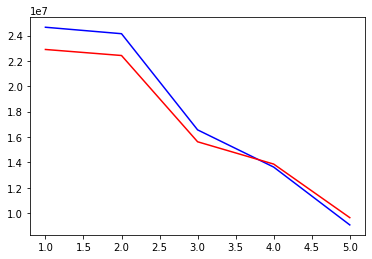

In [35]:
# Incializar parámetros
alpha = 0.0000000000001
epsilon = 0.001
itera = 10000
seed = 1 # Semilla para funciones aleatorias

# Incializar listas para guardar los costos finales
costosTraining = []
costosTest = []

# Tamaño del testing size, observar celda anterior
tsize = 0.4

# Cargar de nuevo el archivo y obtener X y Y
filename = './Datasets/bike-day.csv'
x, y = loadCsv(filename)
print('X size:', np.shape(x), 'Y size:',  np.shape(y))

# Variable para formar matrices polinomiales
xtemp = x

# Grados que voy a evaluar de 1 a 5
poly = range(1, 6)

# Para cada grado polinomial realizar el gradiente descendente, obtener W's y calcular el MSE (error o costo)
for grade in poly:
    print("Grade: ", grade) 
    
    # Construir Matriz polinomial de grado "grade"
    if grade == 1:
        xtemp = x
    else:
        xtemp = np.concatenate((xtemp, x ** grade), axis = 1)
        
    # Añadir unos a la matriz polinomial
    x_1s = addOnes(xtemp)
    
    # Split dataset en Training and Testing
    xTrain, xTest, yTrain, yTest = train_test_split(x_1s, y, test_size = tsize , random_state = seed)
    yTrain = yTrain.reshape(-1, 1)
    yTest = yTest.reshape(-1, 1)
    
    # Inicializar W de forma aleatoria
    m, n = np.shape(xTrain)
    print(m, n)
    initw = np.random.rand(1, n)
    print('W: ', initw.shape)

    # Obtener W y el error MSE (J) a través del GD
    w, it, J = GD(xTrain, yTrain, initw, alpha, epsilon, itera)
    
    # Imprimir la iteración it
    print(f'Iteraciones: ', it)
    
    # Calcular errores MSE de Training y Testing
    costoTrain = mse(yTrain, np.dot(xTrain, w.T))
    costoTest = mse(yTest, np.dot(xTest, w.T))
    
    print('Training cost:', costoTrain)
    print('Testing cost:', costoTest)
    
    # Guardar los valores en las listas
    costosTraining.append(costoTrain)
    costosTest.append(costoTest)
    
# Convertir a arrays las listas
costosTraining = np.array(costosTraining)
costosTest = np.array(costosTest)

# Adecuar dimensiones
costosTraining = costosTraining.reshape(len(costosTraining), 1)
costosTest = costosTest.reshape(len(costosTest), 1)

# Graficar los errores con respecto al grado
plt.plot(poly, costosTraining, 'b')
plt.plot(poly, costosTest, 'r')

## Conclusiones

Escribir conclusiones y observaciones del ejercicio.

La modificación/alteración de los parámetros para los algoritmos usualmente resultará en distintos resultados, tales como overfitting, underfitting y demás. También, combiene monitorear los cambios en estos ya que su correcta definición potencialmente podrá disminuir (o aumentar) la complejidad computacional de los cálculos que se estarían realizando.